# PRML Lab Assignment 6

### Aim: To perform cross validation on MNIST dataset and KNN classifier with k = 5.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

C:\Users\Deena\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 1 - Load the dataset

In [2]:
from sklearn.datasets import fetch_openml
df = fetch_openml('mnist_784')

### 2 - Visualize the data columns

In [3]:
X = df.data
print(df.data.shape)
# for labels
Y = df.target
print(df.target.shape)

(70000, 784)
(70000,)


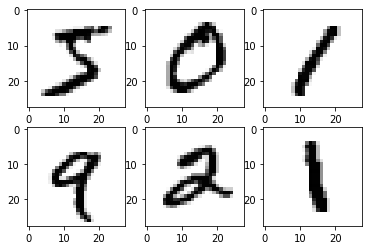

In [4]:
img = df.data.to_numpy()

plt.subplot(231)
plt.imshow((img[0].reshape(28,28)), cmap=plt.cm.gray_r)

plt.subplot(232)
plt.imshow(img[1].reshape(28,28), cmap=plt.cm.gray_r)

plt.subplot(233)
plt.imshow(img[3].reshape(28,28), cmap=plt.cm.gray_r)

plt.subplot(234)
plt.imshow(img[4].reshape(28,28), cmap=plt.cm.gray_r)

plt.subplot(235)
plt.imshow(img[5].reshape(28,28), cmap=plt.cm.gray_r)

plt.subplot(236)
plt.imshow(img[6].reshape(28,28), cmap=plt.cm.gray_r)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(df.data, df.target, test_size=0.14, random_state=0)

In [6]:
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

X_train: (60199, 784)
Y_train: (60199,)
X_test:  (9801, 784)
Y_test:  (9801,)


### 3 - Check the class imbalance

#### Since there is no major difference between the number of values per class, there is no class imbalance present in the dataset.

In [8]:
print("Values per class:")
Y.value_counts()

Values per class:


1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

### 4 - Compare Leave-one-out with 2,3,5 and 10 folds cross validation

In [9]:
cv = LeaveOneOut()

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)

In [11]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [12]:
knn.predict(X_test[0:10])

array(['0', '4', '1', '2', '7', '9', '7', '1', '1', '7'], dtype=object)

In [13]:
Y_pred = knn.predict(X_test)

In [14]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9728599122538516


In [15]:
# making a list of folds
folds = [2,3,5,10]

# making a list for the outputs
accuracy_rate = []

# for loop for different number of loocv 
for fold in folds:
    score = cross_val_score(knn, X, Y,cv=fold, scoring='accuracy', n_jobs=-1)
    accuracy_rate.append(np.mean(score))

print(accuracy_rate)

[0.9643428571428572, 0.9674571297828223, 0.9696571428571428, 0.9710285714285714]


### 5 - Observe the pattern as the number of folds increases.

#### As the number of folds increases there is an increase in the mean accuracy which is visible in the below graph.

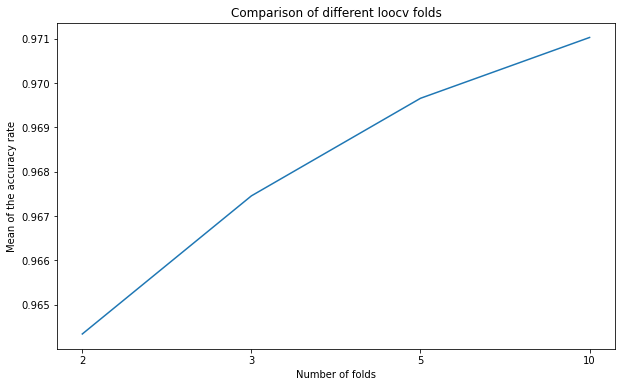

In [16]:
foldss = ['2', '3', '5', '10']
plt.figure(figsize=(10,6))
plt.plot(foldss, accuracy_rate)
plt.title("Comparison of different loocv folds")
plt.xlabel("Number of folds")
plt.ylabel("Mean of the accuracy rate")
plt.show()

### 6 - Identify a good value of k for better accuracy

#### From the below graphs, it can be observed that when the values of k are taken in the range of 1 to 10, k = 3 shows highest accuracy rate.

In [17]:
k_values = [i for i in range (1,10)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, Y, cv=5)
    scores.append(np.mean(score))

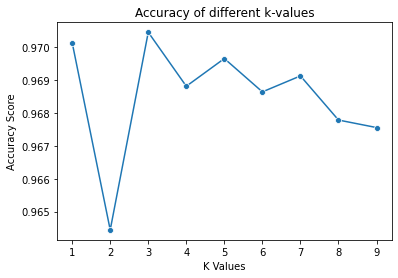

In [19]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.title("Accuracy of different k-values")
plt.show()

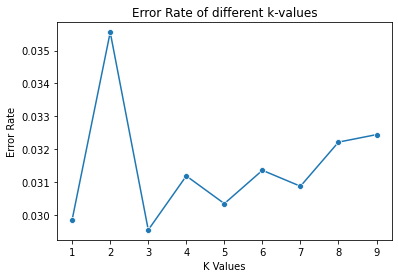

In [20]:
error_rate = []
for score in scores:
    temp = 1 - score
    error_rate.append(temp)
sns.lineplot(x = k_values, y = error_rate, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Error Rate")
plt.title("Error Rate of different k-values")
plt.show()

### 7 - Compare the results with and without class imbalance checking

#### There is no major class imbalance present in the dataset given.